<a href="https://colab.research.google.com/github/anil1984/assignment2/blob/master/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train_transaction = 'https://drive.google.com/open?id=1hYmBl7crLBymgTIseTdJoVj0EJCeVneB' # The shareable link
test_transaction = 'https://drive.google.com/open?id=1gi8O-bMknH_-pEY4WmDQ4fzBLcL0jmls'
train_identity = 'https://drive.google.com/open?id=15IIUK0an9rbyhUDxT5lbs6w8dvCkbC4T'
test_identity = 'https://drive.google.com/open?id=1Y8QcEliOzSHeXArIfBHNHh402rJOzycH'

In [5]:
fluff, id = train_transaction.split('=')
print (id) # Verify that you have everything after '= for train_transaction'


1hYmBl7crLBymgTIseTdJoVj0EJCeVneB


In [6]:
#importing  train_transaction csv from google drive 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_transaction.csv')  
df_train_transaction = pd.read_csv('train_transaction.csv')
# Dataset is now stored in a Pandas Dataframe
df_train_transaction = df_train_transaction.sample(frac=1).reset_index(drop=True)
df_train_transaction.head()


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3304406,0,7913470,171.000,W,13290,302.0,150.0,visa,226.0,debit,269.0,87.0,0.0,NaN,yahoo.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,9.0,2.0,266.0,266.0,28.0,365.0,181.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.00,0.000000,0.0,117.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3104347,0,2297044,39.000,W,9500,321.0,150.0,visa,226.0,debit,231.0,87.0,6.0,NaN,NaN,NaN,2.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,1.0,13.0,13.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,114.50,0.000000,0.0,75.50,0.0,0.000000,39.0,75.500000,75.5,0.0,0.0,0.0,0.0,39.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3071602,0,1800222,100.000,R,18268,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,hotmail.com,anonymous.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,891.833313,0.833333,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.00,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3298639,0,7760240,212.255,C,12730,266.0,185.0,mastercard,224.0,credit,NaN,NaN,NaN,7.0,gmail.com,gmail.com,3.0,11.0,0.0,2.0,0.0,2.0,2.0,5.0,0.0,3.0,3.0,3.0,11.0,3.0,551.0,551.0,19.0,552.0,165.0,402.0,165.0,NaN,NaN,...,0.0,0.0,1.0,2.0,1.0,1.0,0.0,44.59,0.000000,0.0,44.59,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3342419,0,8798672,107.950,W,6963,454.0,150.0,visa,226.0,debit,330.0,87.0,23.0,NaN,gmail.com,NaN,37.0,39.0,0.0,0.0,30.0,28.0,0.0,0.0,24.0,0.0,25.0,0.0,150.0,32.0,53.0,53.0,6.0,53.0,6.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1204.75,491.899994,0.0,892.75,0.0,491.899994,0.0,332.899994,0.0,0.0,312.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
fluff, id = test_transaction.split('=')
print (id) # Verify that you have everything after '='


1gi8O-bMknH_-pEY4WmDQ4fzBLcL0jmls


In [8]:
#importing  test_transaction csv from google drive 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_transaction.csv')  
df_test_transaction = pd.read_csv('test_transaction.csv')
# Dataset is now stored in a Pandas Dataframe
df_test_transaction = df_test_transaction.sample(frac=1).reset_index(drop=True)
df_test_transaction.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3985705,29454402,58.00,W,9992,455.0,150.0,mastercard,126.0,debit,272.0,87.0,5.0,NaN,gmail.com,NaN,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,2.0,1.0,22.0,4.0,86.0,86.0,1.0,273.0,1.0,NaN,NaN,NaN,NaN,522.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58.000000,58.0,0.0,58.000000,0.0,58.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4007626,30214921,35.95,W,13249,111.0,150.0,visa,226.0,debit,264.0,87.0,25.0,NaN,yahoo.com,NaN,5.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,2.0,0.0,3.0,0.0,35.0,5.0,65.0,65.0,8.0,177.0,177.0,NaN,NaN,NaN,NaN,782.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,93.900002,0.0,0.0,93.900002,0.0,0.0,0.0,35.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3904552,26769339,280.00,W,14479,387.0,150.0,visa,226.0,credit,436.0,87.0,24.0,NaN,aol.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,80.0,2.0,636.0,636.0,1.0,786.0,1.0,NaN,NaN,NaN,NaN,786.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1530.000000,151.0,0.0,1530.000000,0.0,151.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4052715,31607701,35.00,H,12725,325.0,150.0,visa,226.0,debit,272.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,265.791656,0.791666,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3712705,20042534,108.50,W,9500,321.0,150.0,visa,226.0,debit,269.0,87.0,505.0,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,NaN,NaN,65.0,0.0,NaN,NaN,NaN,NaN,65.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:

fluff, id = train_identity.split('=')
print (id) # Verify that you have everything after '='

#importing  train_identity csv from google drive 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_identity.csv')  
df_train_identity = pd.read_csv('train_identity.csv')
# Dataset is now stored in a Pandas Dataframe
df_train_identity = df_train_identity.sample(frac=1).reset_index(drop=True)
df_train_identity.head()


15IIUK0an9rbyhUDxT5lbs6w8dvCkbC4T


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3077367,-5.0,201131.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,380.0,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 63.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
1,3094629,-30.0,199867.0,NaN,NaN,-4.0,-34.0,34.0,-51.0,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,12.0,317.0,600.0,252.0,14.0,IP_PROXY:TRANSPARENT,11.0,321.0,147.0,Found,New,NotFound,iOS 11.2.1,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,F,mobile,iOS Device
2,3081236,-5.0,67197.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,49.0,-360.0,Found,Found,166.0,NaN,399.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 11.2.1,mobile safari generic,32.0,2048x1536,match_status:2,T,F,T,F,mobile,iOS Device
3,3522561,-55.0,84559.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,266.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,opera 53.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
4,3471941,0.0,21787.0,0.0,0.0,6.0,-11.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,15.0,352.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android,chrome 65.0,24.0,1920x1080,match_status:2,T,F,T,T,mobile,NaN


In [11]:
fluff, id = test_identity.split('=')
print (id) # Verify that you have everything after '='

#importing  test_identity csv from google drive 

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('test_identity.csv')  
df_test_identity = pd.read_csv('test_identity.csv')
# Dataset is now stored in a Pandas Dataframe
df_test_identity = df_test_identity.sample(frac=1).reset_index(drop=True)

df_test_identity.head()

1Y8QcEliOzSHeXArIfBHNHh402rJOzycH


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,4158578,-5.0,204620.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,266.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 71.0,NaN,NaN,NaN,F,F,T,F,desktop,Windows
1,4115073,-5.0,97275.0,NaN,NaN,0.0,-12.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,166.0,NaN,193.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Windows 10,chrome 71.0,24.0,1024x768,match_status:2,T,F,T,F,desktop,Windows
2,3899992,-5.0,309175.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,NaN,153.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 69.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto C Build/NRD90M.063
3,4077351,0.0,64232.0,0.0,0.0,2.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-480.0,Found,Found,166.0,NaN,529.0,222.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 61.0,24.0,2560x1440,match_status:2,T,F,T,T,desktop,rv:61.0
4,3739078,-25.0,198551.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,Unknown,NaN,225.0,NaN,607.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,mobile safari 11.0,NaN,NaN,NaN,F,F,F,F,mobile,NaN


In [12]:
#merging test dataset

test_dataset = df_test_transaction.merge(df_test_identity, on=["TransactionID"],how='left')
test_dataset.to_csv("test_dataset.csv",index=False)
test_dataset.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3985705,29454402,58.00,W,9992,455.0,150.0,mastercard,126.0,debit,272.0,87.0,5.0,NaN,gmail.com,NaN,4.0,3.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,2.0,1.0,22.0,4.0,86.0,86.0,1.0,273.0,1.0,NaN,NaN,NaN,NaN,522.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4007626,30214921,35.95,W,13249,111.0,150.0,visa,226.0,debit,264.0,87.0,25.0,NaN,yahoo.com,NaN,5.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,2.0,0.0,3.0,0.0,35.0,5.0,65.0,65.0,8.0,177.0,177.0,NaN,NaN,NaN,NaN,782.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3904552,26769339,280.00,W,14479,387.0,150.0,visa,226.0,credit,436.0,87.0,24.0,NaN,aol.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,80.0,2.0,636.0,636.0,1.0,786.0,1.0,NaN,NaN,NaN,NaN,786.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4052715,31607701,35.00,H,12725,325.0,150.0,visa,226.0,debit,272.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,265.791656,0.791666,0.0,...,0.0,113621.0,0.0,0.0,8.0,-10.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,352.0,597.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,iOS 12.1.0,google search application 63.0,32.0,2208x1242,match_status:2,T,F,T,T,mobile,iOS Device
4,3712705,20042534,108.50,W,9500,321.0,150.0,visa,226.0,debit,269.0,87.0,505.0,NaN,gmail.com,NaN,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,0.0,NaN,NaN,65.0,0.0,NaN,NaN,NaN,NaN,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test_dataset.shape

(506691, 433)

In [0]:
#merging train dataset

train_dataset = df_train_identity.merge(df_train_transaction, on=["TransactionID"],how='left')
train_dataset.to_csv("train_dataset.csv",index=False)


In [15]:
train_dataset.shape

(144233, 434)

In [16]:
len(train_dataset[train_dataset["isFraud"]==1])/len(train_dataset)*100

7.847025299342036

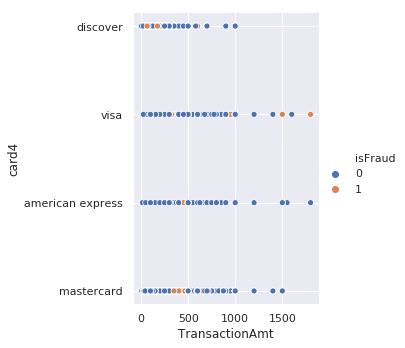

In [17]:
#visualization in seaborn
import seaborn as sns
sns.set()
df= pd.read_csv('train_dataset.csv')
sns.relplot(x="TransactionAmt", y="card4", hue="isFraud",
            data=df);


In [0]:
from sklearn.model_selection import train_test_split
columns_drop=pd.DataFrame({"na_count":train_dataset.isnull().sum().sort_values(ascending=True)})

In [0]:
#create column of percent
columns_drop["per"]=columns_drop["na_count"]/len(train_dataset)

In [0]:
columns_drop

In [0]:
#identifying columns less than .15 limit
columns_final=columns_drop[columns_drop["per"]<.10].index
train_dataset=train_dataset[train_dataset.columns.intersection(columns_final)]

In [34]:
train_dataset.shape

(144233, 244)

In [0]:
#Dealing different datatypes

train_dataset[train_dataset.select_dtypes(include=['object']).columns]

In [0]:
card6_dummy=pd.get_dummies(train_dataset["card6"])

In [0]:
card6_dummy

In [0]:
#adding back to original dataset

train_dataset=pd.concat([train_dataset,card6_dummy],axis=1)

In [41]:
train_dataset=train_dataset._get_numeric_data()
train_dataset=train_dataset.dropna()
len(train_dataset[train_dataset["isFraud"]==1])/len(train_dataset)*100

7.81535391572324

In [0]:
x_data=train_dataset.drop(["isFraud"],axis=1)
y_data=train_dataset["isFraud"]

In [0]:
X_train,X_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.30)

In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [46]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train,y_train)
print('Score:', logistic.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9226498591927048


In [47]:
y_predicted  = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]
